# <center>Loan Data from Prosper - (Explanatory Analysis)</center>

## Introduction

<div style="border-left: 4px solid #ccc; padding-left: 10px;">
    
This dataset [Loan Data from Prosper](https://learn.udacity.com/nanodegrees/nd002-palestine/parts/cd12532/lessons/e2bc9638-6516-4ddb-928e-09e05c20f7f5/concepts/28cb2079-4123-4fe3-b20d-018abb2fe2cb) provides a comprehensive collection of 113,937 loans, encompassing a wide range of variables that offer detailed insights into each loan. With 81 variables per loan, the dataset includes crucial information such as the loan amount, borrower rate (or interest rate), current loan status, and borrower income, among many other attributes. These variables collectively enable an in-depth analysis of loan characteristics, borrower demographics, and financial trends. To facilitate a better understanding of the dataset, please refer to the data dictionary below, which describes each variable in detail.</div>

## Description

<div style="border-left: 4px solid #ccc; padding-left: 10px;">
    
This dataset contains 113,937 loans with 81 variables on each loan, including detailed information about loan amounts, borrower rates, loan status, borrower income, and many other attributes. Below is a description of each column in the dataset we used in out Analysis:

- **ListingCreationDate**: The date the listing was created.
- **Term**: The length of the loan expressed in months.
- **LoanStatus**: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- **BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan.
- **BorrowerRate**: The Borrower's interest rate for this loan.
- **LenderYield**: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
- **ListingCategory (numeric)**: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7 - Other, 8 - Baby & Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.
- **EmploymentStatus**: The employment status of the borrower at the time they posted the listing.
- **EmploymentStatusDuration**: The length in months of the employment status at the time the listing was created.
- **IsBorrowerHomeowner**: A Borrower will be classified as a homeowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- **IncomeRange**: The income range of the borrower at the time the listing was created.
- **IncomeVerifiable**: The borrower indicated they have the required documentation to support their income.
- **StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created.
- **LoanOriginalAmount**: The origination amount of the loan.
- **LoanOriginationDate**: The date the loan was originated.
- **LoanOriginationQuarter**: The quarter in which the loan was originated.
- **MonthlyLoanPayment**: The scheduled monthly loan payment.

</div>

## Investigation Overview

<div style="border-left: 4px solid #ccc; padding-left: 10px;">
    
This investigation focuses on understanding various aspects of loans issued by Prosper, a peer-to-peer lending marketplace. The dataset provided contains detailed information about each loan, including loan terms, borrower details, and loan performance metrics. The primary objective of this analysis is to explore the factors affecting loan outcomes, borrower interest rates, and the relationships between loan amounts and various borrower attributes.


</div>

## Key findings

<div style="border-left: 4px solid #ccc; padding-left: 10px;">

* Loan Term Distribution: The most common loan terms are 36 months, followed by 60 months and 12 months.
* Employment Status: Most borrowers are employed or work full-time, with fewer being self-employed, part-time, retired, or not employed.
* Income Range: The highest frequency of borrowers falls in the $25,000-49,999 income range, followed by $50,000-74,999.
* Loan Origination Quarters: Loan origination peaks in specific quarters, suggesting seasonal trends.
* Correlation Analysis: Monthly Loan Payment strongly correlates with LoanOriginalAmount, indicating higher loan amounts lead to higher monthly payments.
* Income and Loan Payments: Higher income borrowers tend to have higher loan amounts and monthly payments.
* Employment Status and Loan Payments: Employed borrowers generally have lower BorrowerRates and higher MonthlyLoanPayments compared to other employment statuses.
</div>

## Very intresting questions we well answer 

<div style="border-left: 4px solid #ccc; padding-left: 10px;">

1. What is the distribution of loan terms (in months) among the loans in the dataset?
2. How is the frequency of different employment statuses distributed in the dataset, and what are the counts for each category?
3. What is the frequency distribution of borrowers income ranges in the dataset, and how do the counts compare across predefined income categories?
4. How are loans distributed across different loan origination quarters in the dataset, and what are the counts for each quarter over time?
5. What is the strongest correlation with Monthly Loan Payment?
6. How does the relationship between the original loan amount and monthly loan payment vary across different income ranges?
7. How does the Borrower APR vary across different loan terms and employment statuses?
8. How does the Monthly Loan Payment vary for different loan statuses and whether the borrower is a homeowner or not?
</div>

## Importing the nessesry libraries

In [16]:
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting
import warnings  # Manage warnings

## Load the cleaned dataset

In [17]:
loan = pd.read_csv('../datasets/loanCleand.csv')
loan.sample(3)

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
12591,2013-05-14,36,Current,0.22712,0.1899,0.1799,1,Employed,119.0,False,"$25,000-49,999",True,3464.166667,10000,2013-05-21,Q2 2013,366.51
6337,2013-11-02,60,Current,0.28899,0.2629,0.2529,1,Employed,230.0,True,"$25,000-49,999",True,2708.333333,10000,2013-11-05,Q4 2013,301.12
41313,2011-01-09,36,Past Due (61-90 days),0.33097,0.2950,0.2850,1,Employed,35.0,False,"$25,000-49,999",True,3083.333333,7500,2011-01-24,Q1 2011,316.34


****

### Method we needs 

In [18]:
def plot_ordinal_sorted_bar_chart(data, column, x_label, y_label, sort_order):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=data, x=column, order=sort_order, color='tab:blue')
    plt.title(f'Distribution of {x_label} (Ordinal Sorted)')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)
    plt.show()

# For sorted 
def plot_sorted_bar_chart(data, column, x_label, y_label):
    plt.figure(figsize=(14, 8))
    sorted_order = data[column].value_counts().index
    sns.countplot(data=data, x=column, order=sorted_order, color='tab:blue')
    plt.title(f'Distribution of {x_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)
    plt.show()

****

## Answering the questions

### What is the distribution of loan terms (in months) among the loans in the dataset?

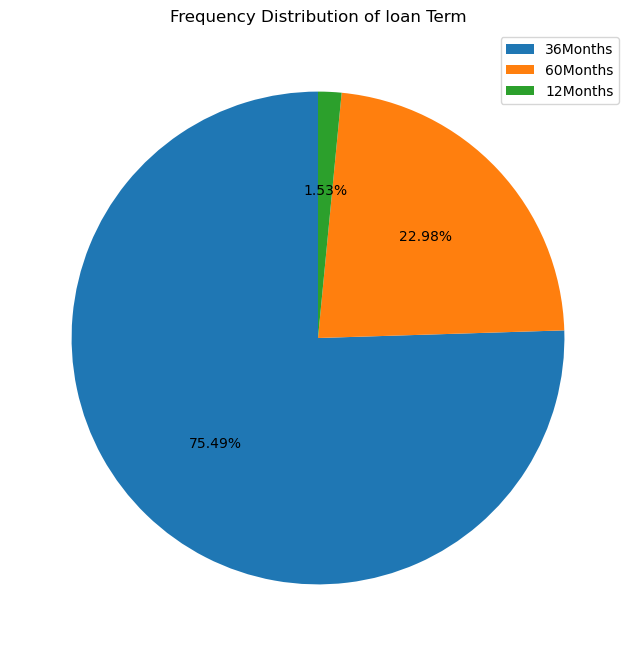

In [19]:
plt.figure(figsize=[8,8])
labels = '36Months','60Months','12Months'
plt.pie(loan['Term'].value_counts(), autopct='%1.2f%%',startangle=90)
plt.title('Frequency Distribution of loan Term')
plt.legend(labels);

As we see most loan done in 36 month so we can target thous category with strong advertisments and offers to improve the income of this company and to push others to take loans from this category

### How is the frequency of different employment statuses distributed in the dataset, and what are the counts for each category?

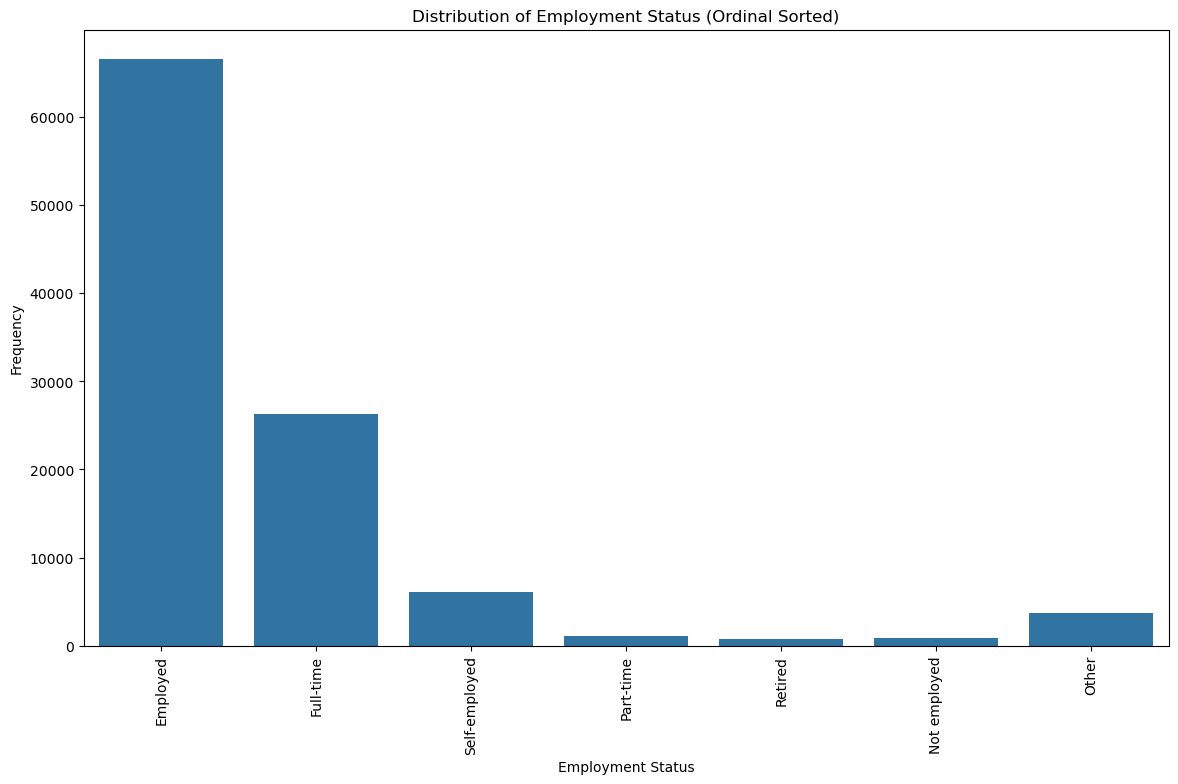

In [20]:
employment_sort_order = [
    'Employed', 'Full-time', 'Self-employed', 'Part-time', 'Retired', 'Not employed', 'Other'
]
plot_ordinal_sorted_bar_chart(loan, 'EmploymentStatus', 'Employment Status', 'Frequency', employment_sort_order)

We can see most of people who toke a loan is employed or full-time so it can pay the Monthly Loan Payment

### What is the frequency distribution of borrowers income ranges in the dataset, and how do the counts compare across predefined income categories?

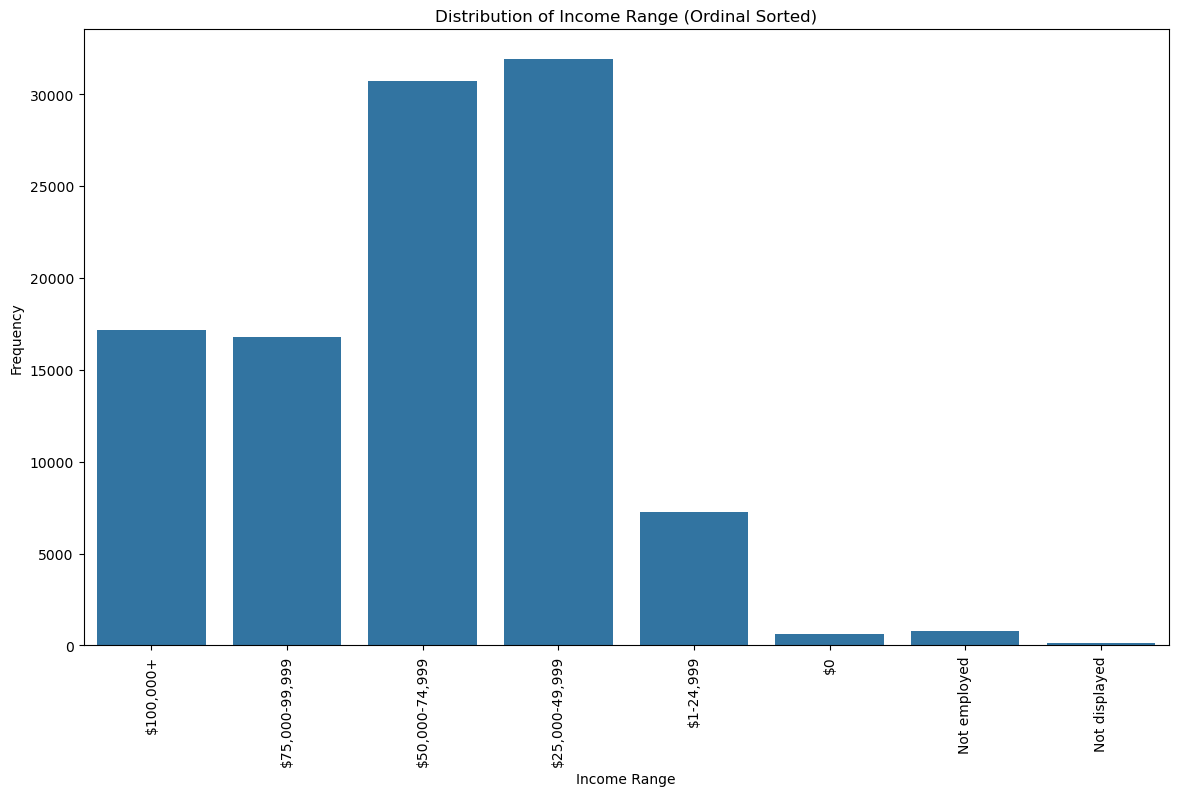

In [21]:
income_sort_order = [
    '$100,000+', '$75,000-99,999', '$50,000-74,999','$25,000-49,999' , '$1-24,999'
    ,'$0' , 'Not employed', 'Not displayed'
]
plot_ordinal_sorted_bar_chart(loan, 'IncomeRange', 'Income Range', 'Frequency', income_sort_order)

We can see here most people who take loans in the people with income range between 25k - 50 k and the 50k - 70k 

### How are loans distributed across different loan origination quarters in the dataset, and what are the counts for each quarter over time?

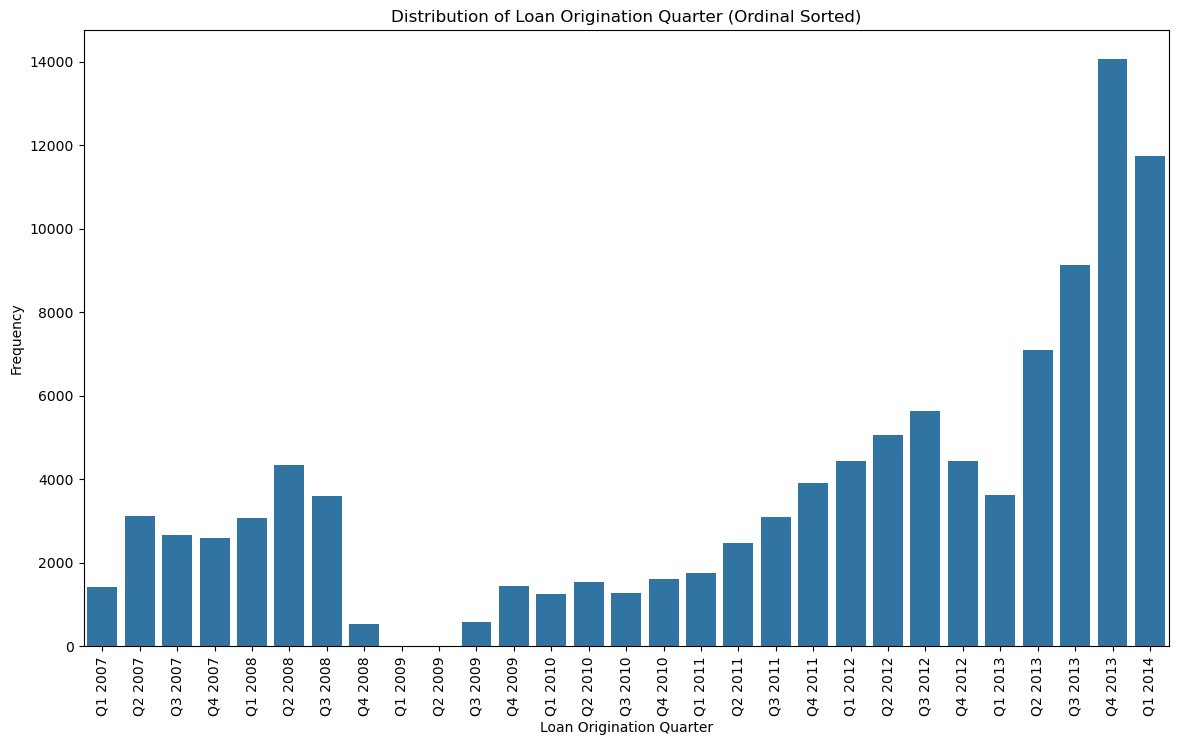

In [22]:
quarter_sort_order = [
    'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
    'Q1 2009', 'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010',
    'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
    'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014'
]
plot_ordinal_sorted_bar_chart(loan, 'LoanOriginationQuarter', 'Loan Origination Quarter', 'Frequency', quarter_sort_order)

We conclude from these visual that there is an increase in the number of loans over time, and we can expect an increase also for the coming quarters, from which we can see an increase in the company’s profits and research behind why people need more loans.

### What is the strongest correlation with Monthly Loan Payment?

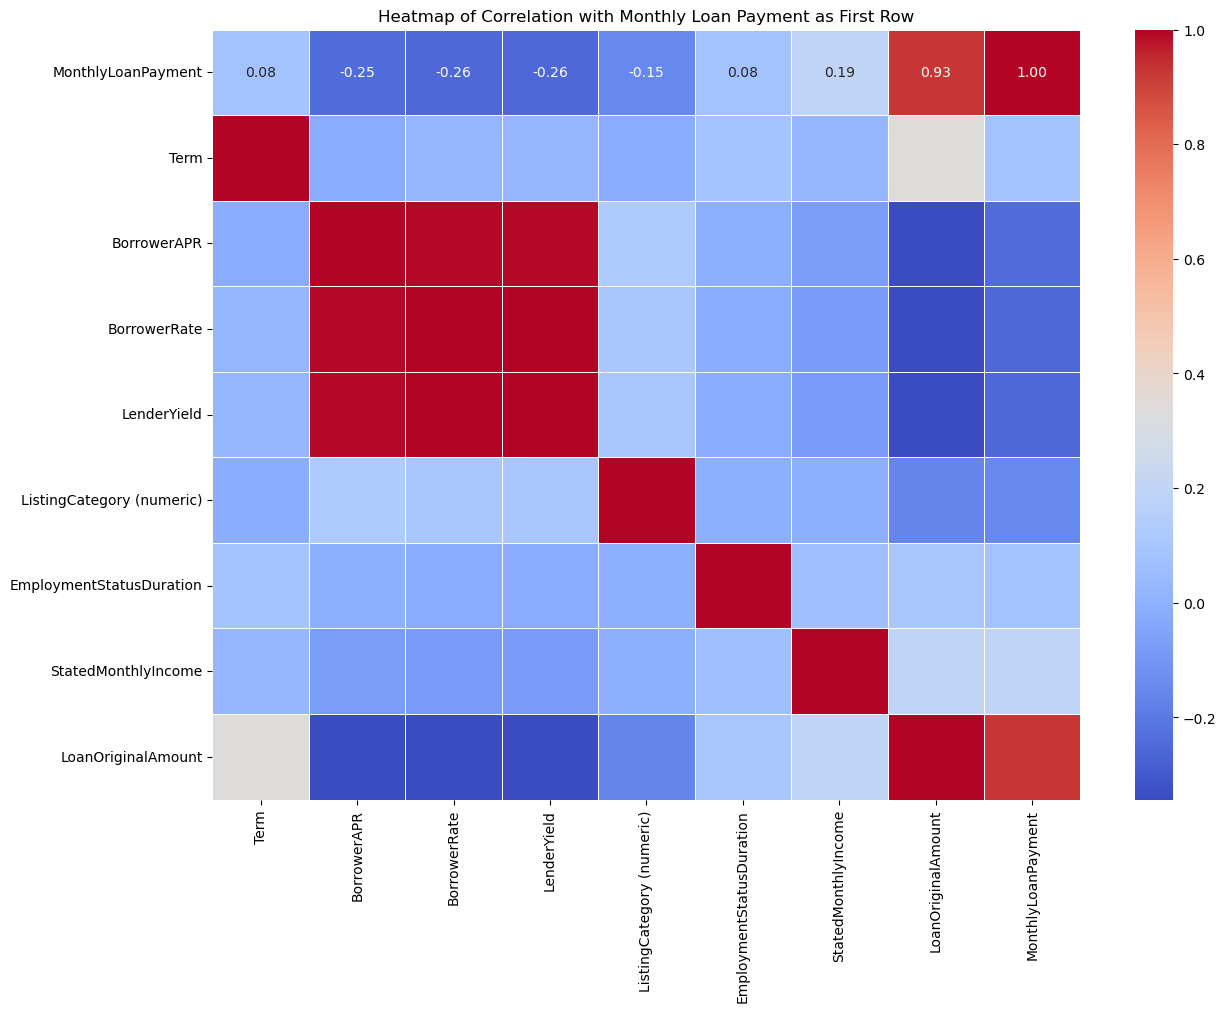

In [23]:
# Select numerical columns
numerical_columns = loan.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr_matrix = loan[numerical_columns].corr()

# Reorder the correlation matrix to have 'MonthlyLoanPayment' as the first row
corr_matrix = corr_matrix.loc[['MonthlyLoanPayment'] + [col for col in corr_matrix if col != 'MonthlyLoanPayment']]

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation with Monthly Loan Payment as First Row')
plt.show()

This visualization shows that the most strongest corrolation with Monthly Loan Payment is Loan Original Amount and this normal ,the higher the value of the loan , the greater the repayment you pay each month loan.

### How does the relationship between the original loan amount and monthly loan payment vary across different income ranges?

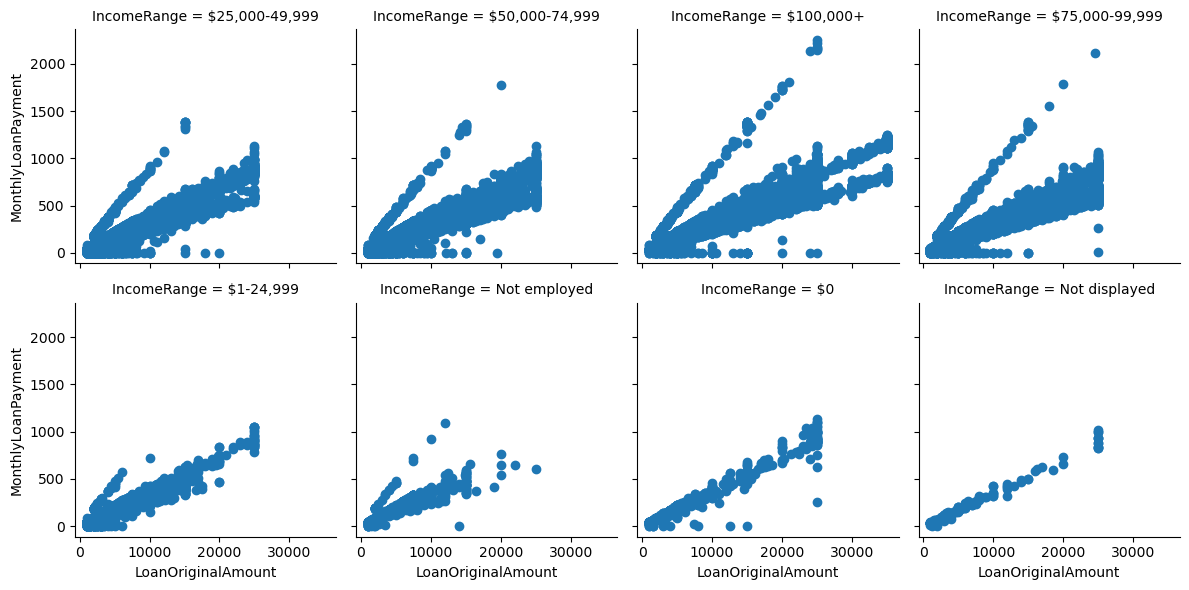

In [24]:
plot = sns.FacetGrid(data=loan, col='IncomeRange', col_wrap=4)
plot.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment');

We can see here that the increasing of the income reange will icreasing also the loan origin amount, we also know if the person in rech and take a loan the loan most be a huge amount loan

### How does the Borrower APR vary across different loan terms and employment statuses?

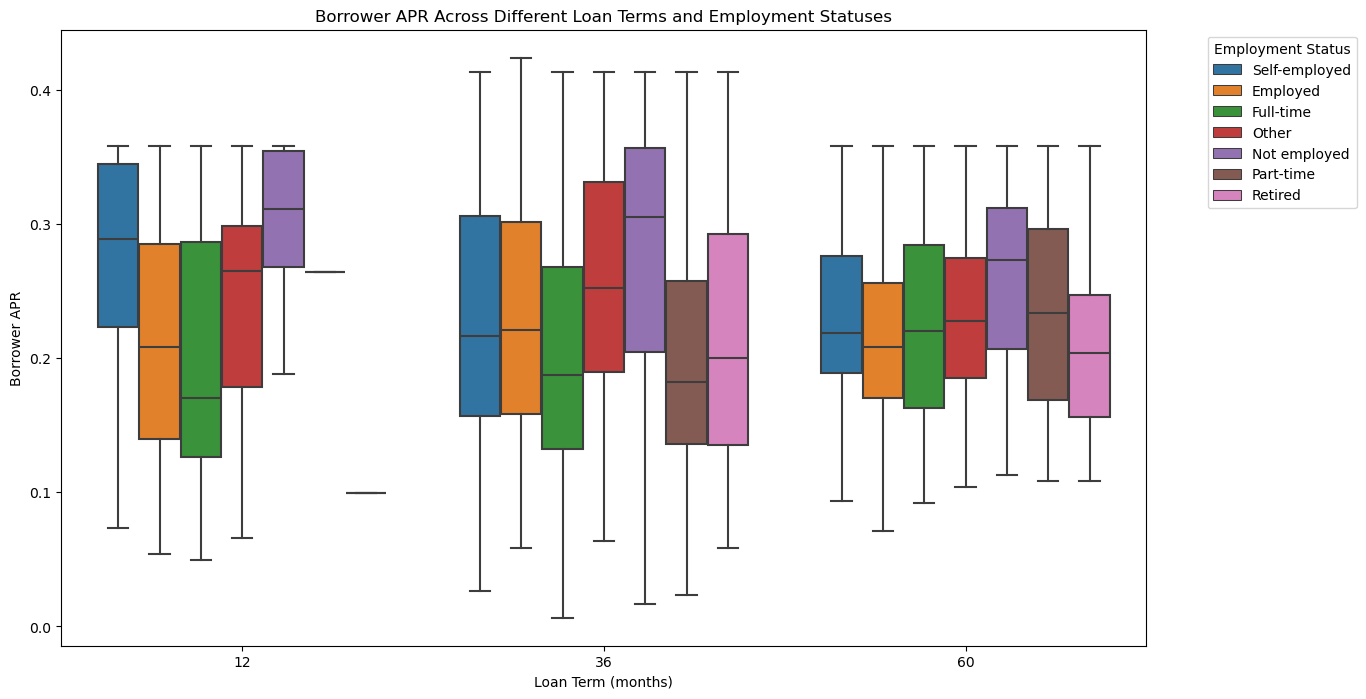

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=loan, x='Term', y='BorrowerAPR', hue='EmploymentStatus')
plt.title('Borrower APR Across Different Loan Terms and Employment Statuses')
plt.xlabel('Loan Term (months)')
plt.ylabel('Borrower APR')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We can conclude from this perception that the annual interest rate is highest for people who take loans while they are not working, and the lowest interest rates on loans for full-time workers.

### How does the Monthly Loan Payment vary for different loan statuses and whether the borrower is a homeowner or not?

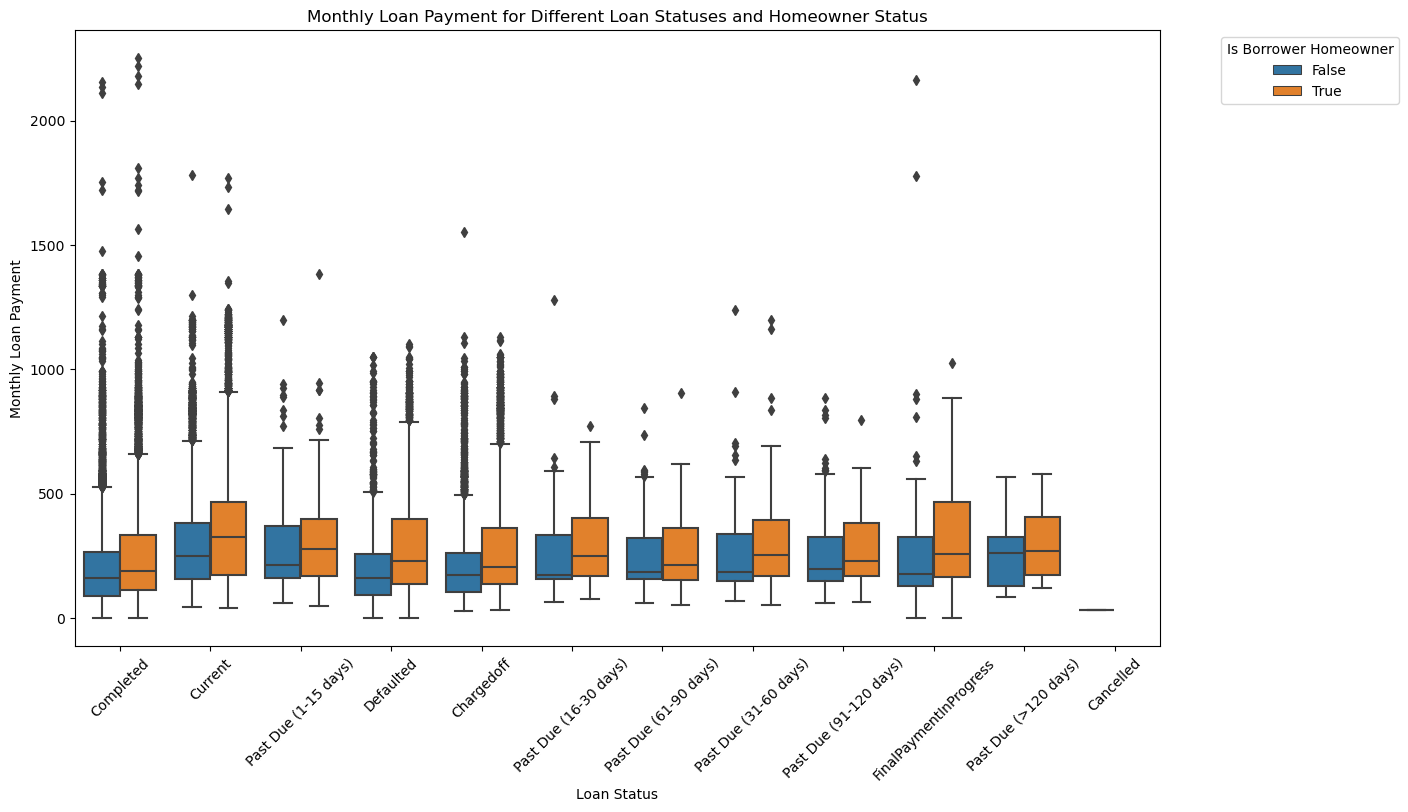

In [26]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=loan, x='LoanStatus', y='MonthlyLoanPayment', hue='IsBorrowerHomeowner')
plt.title('Monthly Loan Payment for Different Loan Statuses and Homeowner Status')
plt.xlabel('Loan Status')
plt.ylabel('Monthly Loan Payment')
plt.legend(title='Is Borrower Homeowner', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

We can conclude from this perception that homeowners take out more loans, but this is normal because homeowners are less homeless. In the case of a completed loan, we have many more maximum values than others, but the variances in the current loan case are larger and the wiskker is higher, and this indicates that the income has become greater for the company.